<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-2-Kaggle-Challenge/blob/master/Assignment_DS_222_Kaggle_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [✓] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [✓] Continue to participate in our Kaggle challenge.
- [✓] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [✓] Try Ordinal Encoding.
- [✓] Try a Random Forest Classifier.
- [✓] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [✓] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [✓] Add your own stretch goal(s) !:  Experiment with and successfully implement multiple feature selection and evaluation methods: feature importances, permutation importances, RFE w/ CV w/ different model types (LogisticRegression & trees).
- [✓] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [✓] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/O.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


# **Setup & Import Dataset:**

In [0]:
# Import libraries used:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Setup data path -- where we can get the data files from:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install eli5  # For finding permutation importances

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Make dataframes with Kaggle's train CSV and test CSV for the Tanzania 
# water dataset:
working_data = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [0]:
# Separate the Kaggle train CSV data into our training and validation sets:
train, val = train_test_split(working_data, train_size=0.75, stratify=working_data['status_group'], random_state=42)  # Note to self: "stratify=" here isn't actually a stratified sample (which would have heterogeneous strata, each of which contains homogeneous data points), but more like dividing into clusters: the different clusters are homogeneous (each with the same proportions of the specific variable), but have heterogeneous observations within them (e.g., both 'functional' and 'non-functional' in this case).
# [?? To do: Remove random_state when finished ??]

# **Data Prep.**

In [0]:
def data_prep(df):
  """Implement all data prep. on all data (train, val and test sets) in the same way."""
  # Make a copy to operate on:
  dataframe = df.copy()
  
  # Change to best data types:
  dataframe['date_recorded'] = pd.to_datetime(dataframe['date_recorded'], infer_datetime_format=True)
  
  # Drop less useful columns:
  dataframe.drop(columns=['amount_tsh', 'num_private', 'payment', 'quantity_group'], inplace=True)  
  # Re 'amount_tsh':  Approx. 70% of the values in this column are zero (0.0 static head is impossible, I think?), and many others seem high or even impossible (is a static head of e.g. 15000 meters even possible for a small village pump??) --> let's just drop this feature completely.
  # Re 'num_private':  Almost all 0's (public use).  For remaining 1%, unclear what the difference between private use = 1 or 50 or 17 is.
  # Re 'payment':  This feature is redundant, same as 'payment_type'.
  # Re 'quantity_group':  Redundant, same as 'quantity' column.

  # New features:
  dataframe['date_recorded_year'] = dataframe['date_recorded'].dt.year
  dataframe['years_from_construction_to_recorded'] = dataframe['date_recorded_year'] - dataframe['construction_year']
  dataframe['years_from_construction_to_recorded'] = np.where(dataframe['years_from_construction_to_recorded'] < 0, np.NaN, dataframe['years_from_construction_to_recorded'])
  dataframe['years_from_construction_to_recorded'] = np.where(dataframe['years_from_construction_to_recorded'] > 100, np.NaN, dataframe['years_from_construction_to_recorded'])
  
  # Replace other missing value markers with NaN:
  
  # Zeros --> NaN (in columns with zeros that clearly represent NaNs):
  cols_with_zeros = ['construction_year', 'gps_height', 'longitude', 'latitude', 'installer', 'population']
  for col in cols_with_zeros:
    dataframe[col].replace({0: np.NaN, -2.000000e-08: np.NaN}, inplace=True)

  # "None"/"none"/"0" (as a string) --> NaN:
  cols_with_none = ['funder', 'wpt_name', 'scheme_management', 'scheme_name']
  for col in cols_with_none:
    dataframe[col].replace({r'[Nn]one': np.NaN, '0': np.NaN}, regex=True, inplace=True)
  
  # "Unknown" (string) --> NaN:
  cols_with_unknown = ['management', 'management_group', 'payment_type', 
                       'water_quality', 'quality_group', 'quantity', 'source', 
                       'source_type', 'source_class']
  for col in cols_with_unknown:
    dataframe[col].replace({r'[Uu]nknown': np.NaN}, regex=True, inplace=True)

  return dataframe

In [0]:
# Data prep. for all:
train = data_prep(train)
val = data_prep(val)
test = data_prep(test)

In [7]:
# Take a look at our training data with Pandas profiling:
import pandas_profiling

train_profile_report = train.profile_report(
    check_correlation_pearson=False, 
    correlations={
        'pearson': False, 
        'spearman': False, 
        'kendall': False, 
        'phi_k': False, 
        'cramers': False, 
        'recoded':False
    }, 
    plot={'histogram': {'bayesian_blocks_bins': False}}
)
train_profile_report

In [0]:
# Define starter features and target:  Using all features (pre-feature selection):
features = train.columns.tolist()
features.remove('date_recorded')
features.remove('status_group')

target = 'status_group'

In [0]:
# Features matrices and target vectors for train and val sets:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Check to make sure X matrices have the same numbers of columns:
assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1]

# **Feature Selection:**

**Feature Selection Check #1:  RFECV (recursive feature elimination) with LogisticRegression:**

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFECV
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

# Fit pipeline and transform train and val sets:
X_train_transformed = transformers.fit_transform(X_train, y_train)
X_val_transformed = transformers.transform(X_val)

model = LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)

# Initiate and fit the RFECV feature selector:
feature_selector = RFECV(estimator=model, step=1, cv=StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=42), scoring='accuracy', n_jobs=-1) # cv:  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42) OR cv=StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=42)
feature_selector.fit(X_train_transformed, y_train)

# X_rfe = feature_selector.transform(X_train_scaled)

# Performance on training data:
y_true_rfe_train = y_train
y_pred_rfe_train = feature_selector.predict(X_train_transformed)

print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_rfe_train, y_pred_rfe_train):.3f}')
recall_rfe_train = recall_score(y_true_rfe_train, y_pred_rfe_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_rfe_train:.3f}\n')

# Apply to validation data and get score:
y_true_rfe_val = y_val
y_pred_rfe_val = feature_selector.predict(X_val_transformed)

print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_rfe_val, y_pred_rfe_val):.3f}')
recall_rfe_val = recall_score(y_true_rfe_val, y_pred_rfe_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_rfe_val:.3f}\n')

# X_rfe = feature_selector.transform(X_train_scaled)

Model performance on training set:

Training set accuracy: 0.694
Training set recall (TP / (TP + FN)): 0.694

Model performance on validation set:

Validation set accuracy: 0.697
Validation set recall (TP / (TP + FN)): 0.697



Optimal number of features : 18
Capture bulk of accuracy with: 7


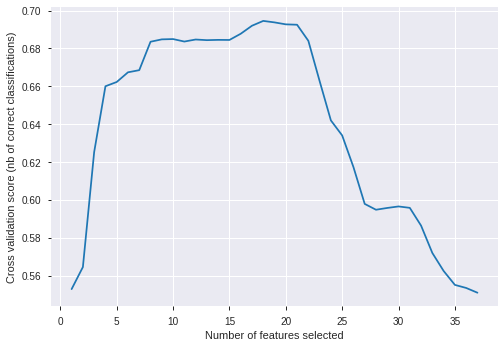

In [11]:
print("Optimal number of features : %d" % feature_selector.n_features_)
num_features_baseline = next(x for x, value in enumerate(feature_selector.grid_scores_) if value > 0.68)
print(f'Capture bulk of accuracy with: {num_features_baseline}')

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(feature_selector.grid_scores_) + 1), feature_selector.grid_scores_)
plt.show()

In [12]:
ranks_rfecv = pd.DataFrame(data=feature_selector.ranking_, index=X_train.columns, columns=['ranking'])
ranks_rfecv['include'] = feature_selector.support_
ranks_rfecv['grid_scores'] = feature_selector.grid_scores_
ranks_rfecv
# .sort_values(by=['grid_scores'], ascending=True)

ranking  include  grid_scores
id                                        19    False     0.552817
funder                                    12    False     0.564467
gps_height                                 8    False     0.625219
installer                                  9    False     0.660011
longitude                                  1     True     0.662267
latitude                                   2    False     0.667385
wpt_name                                  16    False     0.668519
basin                                      1     True     0.683535
subvillage                                17    False     0.684792
region                                     3    False     0.684949
region_code                                5    False     0.683636
district_code                              4    False     0.684714
lga                                       10    False     0.684377
ward                                      11    False     0.684523
population                                15    False     0.684478
public_meeting                             1     True     0.687755
recorded_by                               20    False     0.691998
scheme_management                          1     True     0.694545
scheme_name                               14    False     0.693760
permit                                    13    False     0.692727
construction_year                          6    False     0.692525
extraction_type                            1     True     0.684029
extraction_type_group                      1     True     0.662761
extraction_type_class                      1     True     0.641964
management                                 1     True     0.634029
management_group                          18    False     0.617318
payment_type                               1     True     0.597845
water_quality                              1     True     0.594759
quality_group                              1     True     0.595701
quantity                                   1     True     0.596498
source                                     1     True     0.595758
source_type                                1     True     0.586364
source_class                               1     True     0.571908
waterpoint_type                            1     True     0.562413
waterpoint_type_group                      1     True     0.555039
date_recorded_year                         7    False     0.553423
years_from_construction_to_recorded        1     True     0.550909

In [13]:
feature_names = X_train.columns
selected_features_logreg = feature_names[feature_selector.support_].tolist()
selected_features_logreg

['longitude',
 'basin',
 'public_meeting',
 'scheme_management',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'years_from_construction_to_recorded']

**Feature Selection Check #2:  RFECV with RandomForestClassifier:**

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFECV
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

# Fit pipeline and transform train and val sets:
X_train_transformed = transformers.fit_transform(X_train, y_train)
X_val_transformed = transformers.transform(X_val)

model = ExtraTreesClassifier(n_estimators=100, min_samples_leaf=2, bootstrap=True, n_jobs=-1, random_state=42)  # max_depth=15, min_samples_leaf=2, min_weight_fraction_leaf=??
# [?? To do: Remove random states at end ??]

# Initiate and fit the RFECV feature selector:
feature_selector = RFECV(estimator=model, step=1, cv=3, scoring='accuracy', n_jobs=-1)  # cv:  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42) OR cv=StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=42)
feature_selector.fit(X_train_transformed, y_train)

# X_rfe = feature_selector.transform(X_train_scaled)

# Performance on training data:
y_true_rfe_train = y_train
y_pred_rfe_train = feature_selector.predict(X_train_transformed)

print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_rfe_train, y_pred_rfe_train):.3f}')
recall_rfe_train = recall_score(y_true_rfe_train, y_pred_rfe_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_rfe_train:.3f}\n')

# Apply to validation data and get score:
y_true_rfe_val = y_val
y_pred_rfe_val = feature_selector.predict(X_val_transformed)

print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_rfe_val, y_pred_rfe_val):.3f}')
recall_rfe_val = recall_score(y_true_rfe_val, y_pred_rfe_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_rfe_val:.3f}\n')

# X_rfe = feature_selector.transform(X_train_scaled)

Model performance on training set:

Training set accuracy: 0.896
Training set recall (TP / (TP + FN)): 0.896

Model performance on validation set:

Validation set accuracy: 0.807
Validation set recall (TP / (TP + FN)): 0.807



Optimal number of features : 37
Capture bulk of accuracy with: 12


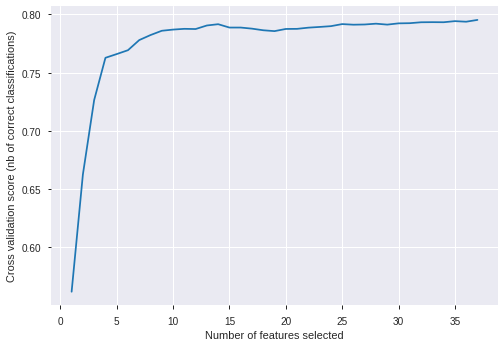

In [15]:
print("Optimal number of features : %d" % feature_selector.n_features_)
num_features_baseline = next(x for x, value in enumerate(feature_selector.grid_scores_) if value > 0.79)
print(f'Capture bulk of accuracy with: {num_features_baseline}')

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(feature_selector.grid_scores_) + 1), feature_selector.grid_scores_)
plt.show()

In [16]:
ranks_rfecv_2 = pd.DataFrame(data=feature_selector.ranking_, index=X_train.columns, columns=['ranking'])
ranks_rfecv_2['include'] = feature_selector.support_
ranks_rfecv_2['grid_scores'] = feature_selector.grid_scores_
ranks_rfecv_2
# .sort_values(by=['grid_scores'], ascending=True)

ranking  include  grid_scores
id                                         1     True     0.562043
funder                                     1     True     0.662671
gps_height                                 1     True     0.726554
installer                                  1     True     0.762806
longitude                                  1     True     0.766016
latitude                                   1     True     0.769338
wpt_name                                   1     True     0.778025
basin                                      1     True     0.782335
subvillage                                 1     True     0.786016
region                                     1     True     0.787026
region_code                                1     True     0.787677
district_code                              1     True     0.787497
lga                                        1     True     0.790550
ward                                       1     True     0.791650
population                                 1     True     0.788777
public_meeting                             1     True     0.788777
recorded_by                                1     True     0.787834
scheme_management                          1     True     0.786442
scheme_name                                1     True     0.785701
permit                                     1     True     0.787565
construction_year                          1     True     0.787654
extraction_type                            1     True     0.788687
extraction_type_group                      1     True     0.789293
extraction_type_class                      1     True     0.789966
management                                 1     True     0.791740
management_group                           1     True     0.791223
payment_type                               1     True     0.791403
water_quality                              1     True     0.792099
quality_group                              1     True     0.791291
quantity                                   1     True     0.792368
source                                     1     True     0.792525
source_type                                1     True     0.793311
source_class                               1     True     0.793401
waterpoint_type                            1     True     0.793333
waterpoint_type_group                      1     True     0.794276
date_recorded_year                         1     True     0.793782
years_from_construction_to_recorded        1     True     0.795331

In [17]:
feature_names = X_train.columns
selected_features_tree = feature_names[feature_selector.support_].tolist()
selected_features_tree

['id',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'date_recorded_year',
 'years_from_construction_to_recorded']

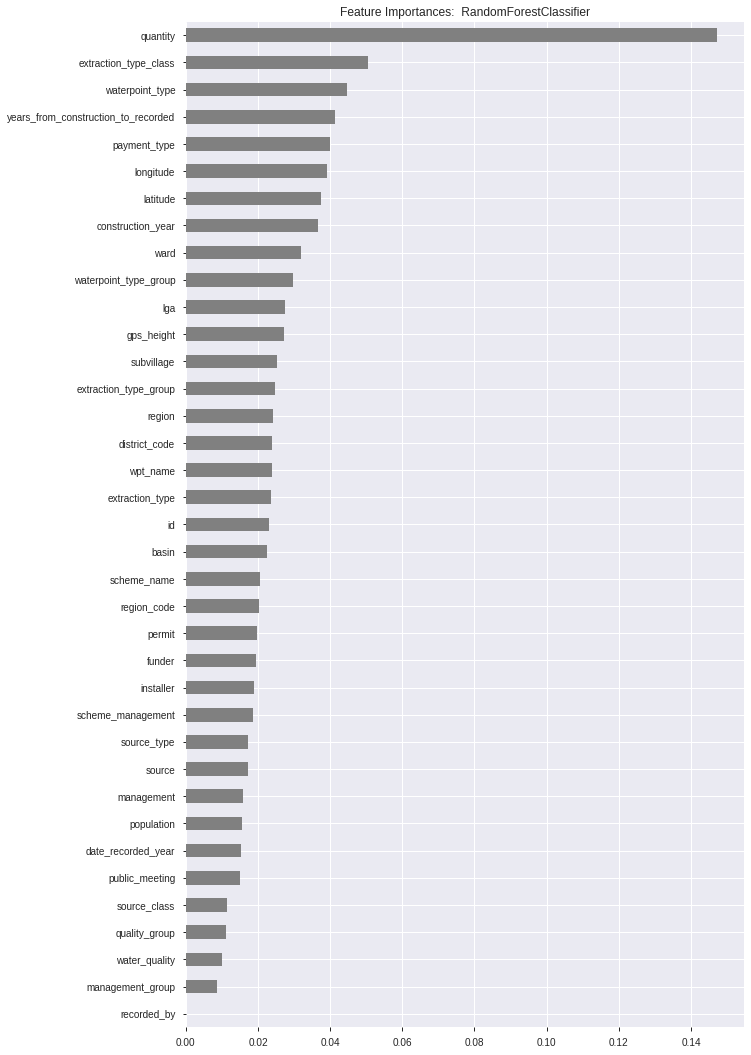

In [18]:
# Feature importances:
%matplotlib inline
import matplotlib.pyplot as plt

feature_names = X_train.columns
importances = pd.Series(feature_selector.estimator_.feature_importances_, feature_names)

# Plot feature importances:
n = len(feature_names)
plt.figure(figsize=(10, n/2))
importances.sort_values().plot.barh(color='grey')
plt.title('Feature Importances:  RandomForestClassifier')
plt.show()

**Final Features Selected:**

In [0]:
# Define final features and target, based on above findings re feature importances:
features = set(train.columns)
to_remove = set(['id', 'date_recorded', 'status_group', 'recorded_by', 'region_code', 
                 'extraction_type', 'extraction_type_group', 
                 'scheme_management', 'source', 'quality_group', 
                 'waterpoint_type_group'])  # NaN > 30%:  'construction_year', 'years_from_construction_to_recorded', 'gps_height', 'population'
features = list(features - to_remove)

# # Too many missing values:  [?? To do:  Remove this ??]
# 'construction_year'
# 'years_from_construction_to_recorded'
# 'gps_height'
# 'population'

target = 'status_group'

# Features matrices and target vectors for train and val sets:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Check to make sure X matrices have the same numbers of columns:
assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1]

In [0]:
# BACKUP FOR ONEHOT ONLY:  
# Features matrices and target vectors for OneHotEncoding Models 
# (e.g., used below for LogisticRegression):

# Dataframe of features only (to match test dataframe dimensions):
train_features_onehot = train.drop(columns=[target])

# List of numeric features:
numeric_features = train_features_onehot.select_dtypes(include='number').columns.tolist()

# List of categorical features:
cardinality = train_features_onehot.select_dtypes(exclude='number').nunique()

# List of all categorical features we can encode (nunique values = cardinality <= 50):
categorical_features = cardinality[cardinality <= 30].index.tolist()

# Combine to get list of all features we can either (a) work with directly 
# (numeric) or (b) encode (categorical with <= 30 unique values):
features_onehot = numeric_features + categorical_features

# Drop irrelevant columns (based on the above feature importances):
features_onehot.remove('recorded_by')

# Remove columns that are exact or very close duplicates of other columns:
to_remove = set(['id', 'date_recorded', 'status_group', 'recorded_by', 'region', 
                 'extraction_type', 'extraction_type_group', 
                 'scheme_management', 'source', 'quality_group', 
                 'waterpoint_type_group'])
features_onehot = list(set(features_onehot) - to_remove)

# # Too many missing values:
# 'construction_year'
# 'years_from_construction_to_recorded'
# 'gps_height'
# 'population'

# Features matrices and target vectors for train and val sets:
X_train_onehot = train[features_onehot]
y_train_onehot = train[target]
X_val_onehot = val[features_onehot]
y_val_onehot = val[target]
X_test_onehot = test[features_onehot]

# Check to make sure X matrices have the same numbers of columns:
assert X_train_onehot.shape[1] == X_val_onehot.shape[1] == X_test_onehot.shape[1]

# **Baseline Models:**

**Baseline 1:  Dummy Model:  Majority Classifier:**

In [28]:
y_train.value_counts(dropna=False, normalize=True)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

In [0]:
majority_class = y_train.mode()[0]

In [30]:
# Get accuracy score for our Baseline 1: Dummy Majority Classifier Model:
y_true_baseline1_val = y_val
y_pred_baseline1_val = [majority_class] * len(val['status_group'])
print('Baseline 1:  Dummy Model Majority Classifier Performance:\n')
print(f'Accuracy: {accuracy_score(y_true_baseline1_val, y_pred_baseline1_val):.3f}')
recall_baseline1 = recall_score(y_true_baseline1_val, y_pred_baseline1_val, average='micro')
print(f'Recall (TP / (TP + FN)): {recall_baseline1:.3f}\n')

Baseline 1:  Dummy Model Majority Classifier Performance:

Accuracy: 0.543
Recall (TP / (TP + FN)): 0.543



In [31]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized) for reference:')
cm_baseline1 = pd.DataFrame(confusion_matrix(y_true_baseline1_val, y_pred_baseline1_val), index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_baseline1 / cm_baseline1.sum().sum()).sum().sum(), 10) == 1.0
cm_baseline1_normalized = cm_baseline1 / cm_baseline1.sum().sum()
cm_baseline1_normalized

Confusion matrix (normalized) for reference:


Predicted 0: Functional  ...  Predicted 2: Non Functional
Actual 0: Functional                              0.543098  ...                          0.0
Actual 1: Functional Needs Repair                 0.072660  ...                          0.0
Actual 2: Non Functional                          0.384242  ...                          0.0

[3 rows x 3 columns]

**Baseline 2:  k-means Clustering (w/ PCA for dimensionality reduction):**

In [0]:
# [?? To do:  Try PCA --> k-means tomorrow ??]

**Baseline 2.5:  k-NN Classification (k-Nearest Neighbors):**

In [33]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)
)

# Fit on training data:
pipeline.fit(X_train_onehot, y_train)

# Performance on training data:
y_true_b2_train = y_train
y_pred_b2_train = pipeline.predict(X_train_onehot)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_b2_train, y_pred_b2_train):.3f}')
recall_b2_train = recall_score(y_true_b2_train, y_pred_b2_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_b2_train:.3f}\n')

# Apply to validation data and get score:
y_true_b2_val = y_val
y_pred_b2_val = pipeline.predict(X_val_onehot)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_b2_val, y_pred_b2_val):.3f}')
recall_b2_val = recall_score(y_true_b2_val, y_pred_b2_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_b2_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.832
Training set recall (TP / (TP + FN)): 0.832

Model performance on validation set:

Validation set accuracy: 0.778
Validation set recall (TP / (TP + FN)): 0.778



In [34]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_b2 = pd.DataFrame(confusion_matrix(y_true_b2_val, y_pred_b2_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_b2 / cm_b2.sum().sum()).sum().sum(), 10) == 1.0
cm_b2_normalized = cm_b2 / cm_b2.sum().sum()
cm_b2_normalized

Confusion matrix (normalized):


0         1         2
0  0.476229  0.015556  0.051313
1  0.040471  0.021212  0.010976
2  0.097239  0.006599  0.280404

**Baseline 3:  LogisticRegression Classifier:**

In [38]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1, random_state=42)  # [?? To do:  Remove random_state ??]
)

# Fit on training data:
pipeline.fit(X_train_onehot, y_train)

# Performance on training data:
y_true_baseline3_train = y_train
y_pred_baseline3_train = pipeline.predict(X_train_onehot)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_baseline3_train, y_pred_baseline3_train):.3f}')
recall_baseline3_train = recall_score(y_true_baseline3_train, y_pred_baseline3_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_baseline3_train:.3f}\n')

# Apply to validation data and get score:
y_true_baseline3_val = y_val
y_pred_baseline3_val = pipeline.predict(X_val_onehot)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_baseline3_val, y_pred_baseline3_val):.3f}')
recall_baseline3_val = recall_score(y_true_baseline3_val, y_pred_baseline3_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_baseline3_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.732
Training set recall (TP / (TP + FN)): 0.732

Model performance on validation set:

Validation set accuracy: 0.732
Validation set recall (TP / (TP + FN)): 0.732



In [39]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_baseline3 = pd.DataFrame(confusion_matrix(y_true_baseline3_val, y_pred_baseline3_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_baseline3 / cm_baseline3.sum().sum()).sum().sum(), 10) == 1.0
cm_baseline3_normalized = cm_baseline3 / cm_baseline3.sum().sum()
cm_baseline3_normalized

Confusion matrix (normalized):


0         1         2
0  0.489966  0.001347  0.051785
1  0.057643  0.002088  0.012929
2  0.142761  0.001751  0.239731

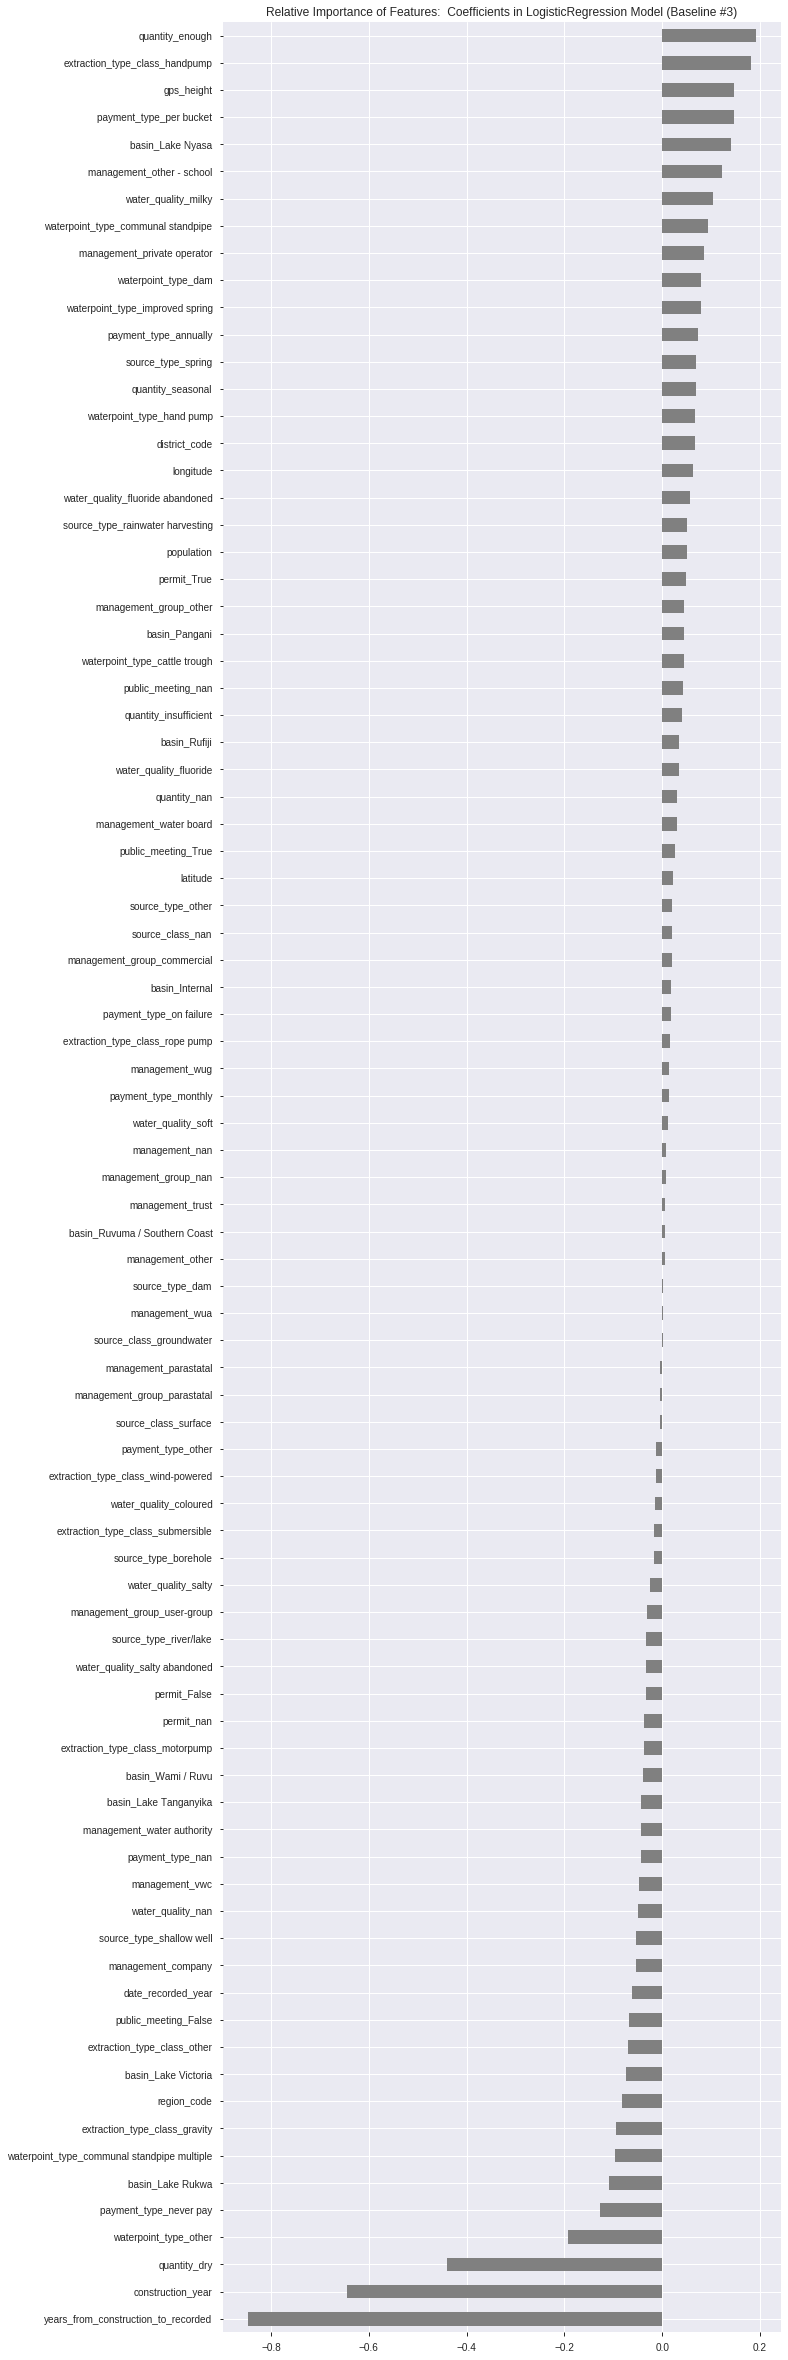

In [40]:
# Feature importances:  Get coefficients of LogisticRegression model to see 
# which features have more of an impact on the model's predictions:
%matplotlib inline
import matplotlib.pyplot as plt

baseline3_logreg = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val_onehot).columns
coefficients = pd.Series(baseline3_logreg.coef_[0], encoded_columns)

# Plot on chart:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
coefficients.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in LogisticRegression Model (Baseline #3)')
plt.show()

**Baseline 4:  Simple Single DecisionTree:**

In [41]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    DecisionTreeClassifier(min_samples_leaf=2, random_state=42)  # max_depth=20, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.001 ??
    # [?? To do:  Remove random_state ??]
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_b4_train = y_train
y_pred_b4_train = pipeline.predict(X_train)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_b4_train, y_pred_b4_train):.3f}')
recall_b4_train = recall_score(y_true_b4_train, y_pred_b4_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_b4_train:.3f}\n')

# Apply to validation data and get score:
y_true_b4_val = y_val
y_pred_b4_val = pipeline.predict(X_val)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_b4_val, y_pred_b4_val):.3f}')
recall_b4_val = recall_score(y_true_b4_val, y_pred_b4_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_b4_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.944
Training set recall (TP / (TP + FN)): 0.944

Model performance on validation set:

Validation set accuracy: 0.712
Validation set recall (TP / (TP + FN)): 0.712



In [42]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_b4 = pd.DataFrame(confusion_matrix(y_true_b4_val, y_pred_b4_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_b4 / cm_b4.sum().sum()).sum().sum(), 10) == 1.0
cm_b4_normalized = cm_b4 / cm_b4.sum().sum()
cm_b4_normalized

Confusion matrix (normalized):


0         1         2
0  0.420404  0.031852  0.090842
1  0.036902  0.023367  0.012391
2  0.099192  0.017239  0.267811

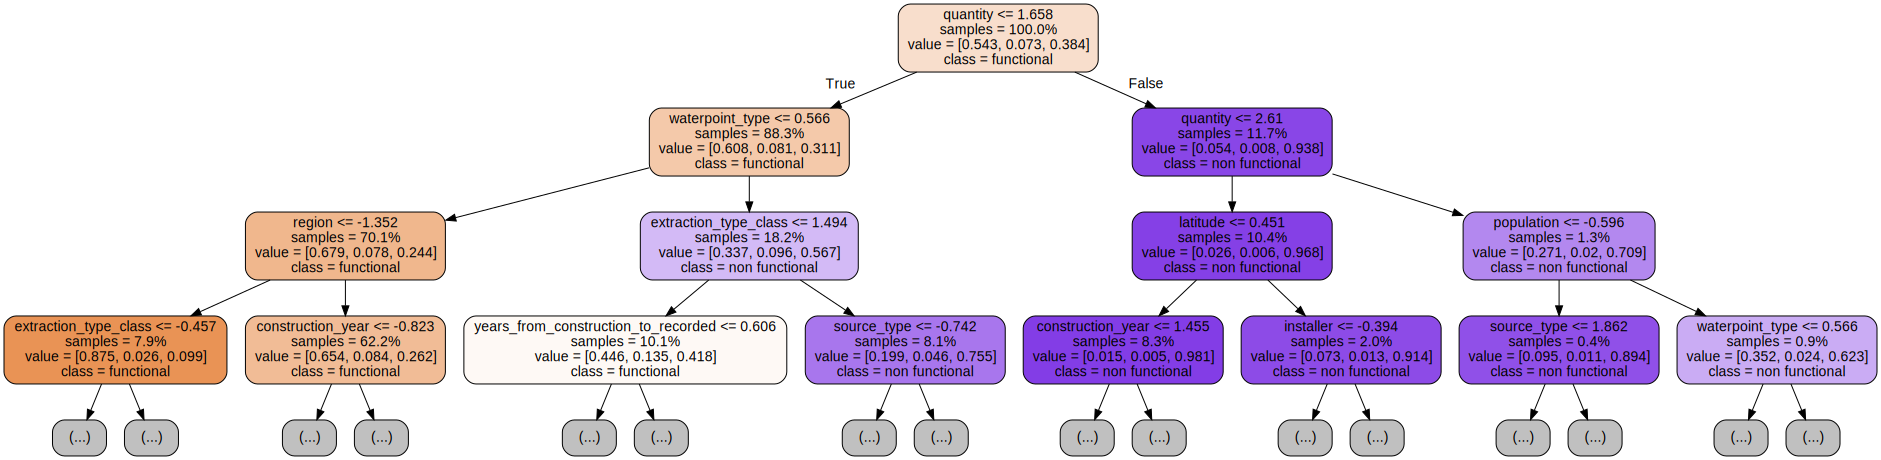

In [43]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

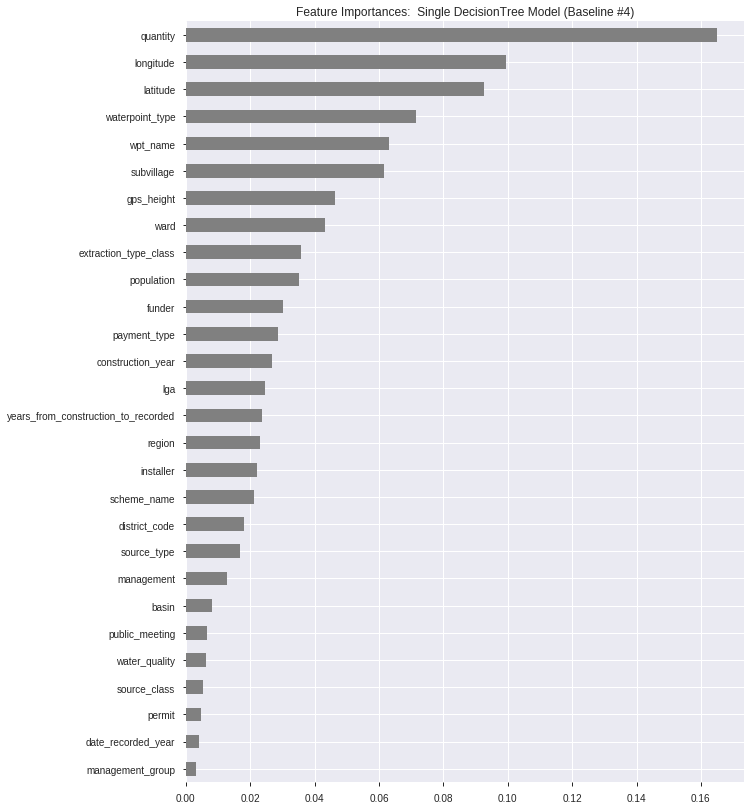

In [44]:
# Feature Importances:
baseline4_decisiontree = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(baseline4_decisiontree.feature_importances_, encoded_columns)

# Plot on chart:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
importances.sort_values().plot.barh(color='grey')
plt.title('Feature Importances:  Single DecisionTree Model (Baseline #4)')
plt.show()

# **Models/Predictions:**

**Model 1:  LogisticRegression With Cross-validation:**

In [45]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegressionCV(multi_class='auto', cv=StratifiedKFold(n_splits=5), scoring='accuracy', solver='lbfgs', n_jobs=-1, random_state=42)  # [?? To do:  Remove random_state ??]  # max_iter=100 if takes too long
)

# Fit on training data:
pipeline.fit(X_train_onehot, y_train)

# Performance on training data:
y_true_m1_train = y_train
y_pred_m1_train = pipeline.predict(X_train_onehot)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_m1_train, y_pred_m1_train):.3f}')
recall_m1_train = recall_score(y_true_m1_train, y_pred_m1_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_m1_train:.3f}\n')

# Apply to validation data and get score:
y_true_m1_val = y_val
y_pred_m1_val = pipeline.predict(X_val_onehot)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_m1_val, y_pred_m1_val):.3f}')
recall_m1_val = recall_score(y_true_m1_val, y_pred_m1_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_m1_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.732
Training set recall (TP / (TP + FN)): 0.732

Model performance on validation set:

Validation set accuracy: 0.732
Validation set recall (TP / (TP + FN)): 0.732



In [46]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_m1 = pd.DataFrame(confusion_matrix(y_true_m1_val, y_pred_m1_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_m1 / cm_m1.sum().sum()).sum().sum(), 10) == 1.0
cm_m1_normalized = cm_m1 / cm_m1.sum().sum()
cm_m1_normalized

Confusion matrix (normalized):


0         1         2
0  0.490707  0.001145  0.051246
1  0.057643  0.001953  0.013064
2  0.143838  0.001414  0.238990

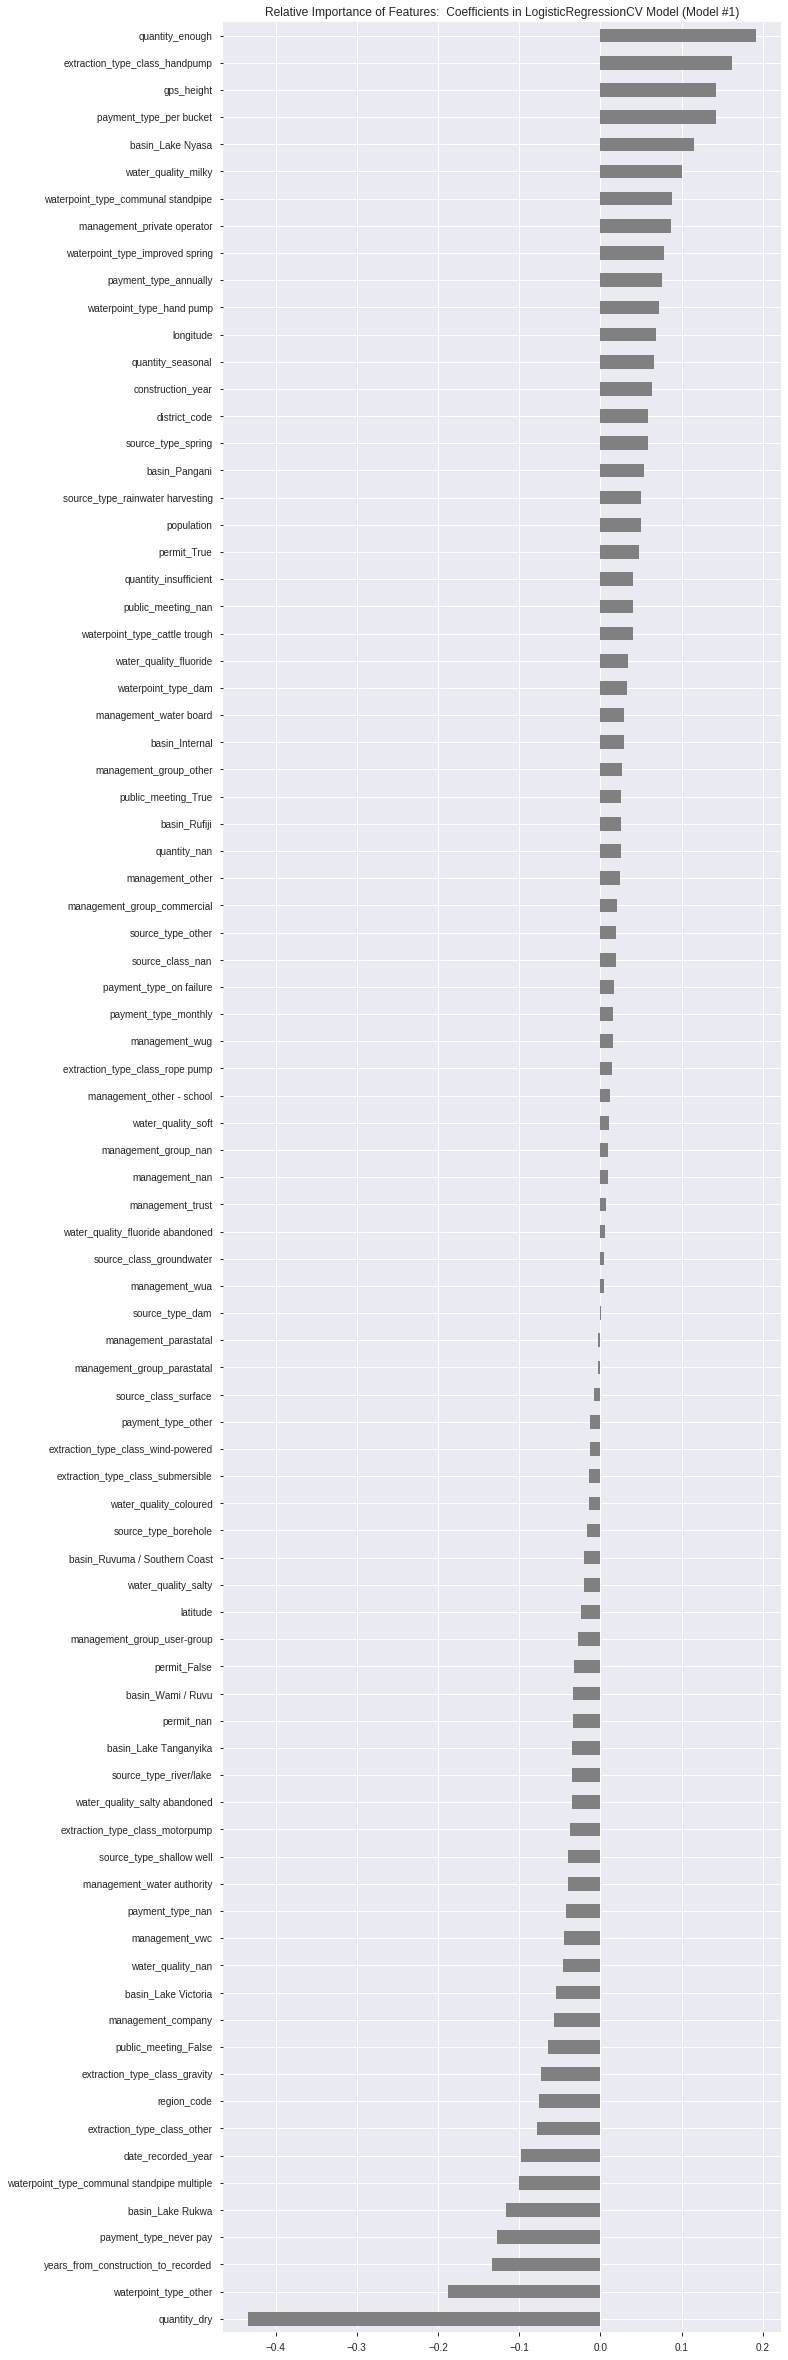

In [47]:
# Feature importances:  Get coefficients of LogisticRegressionCV model to see 
# which features have more of an impact on the model's predictions:
%matplotlib inline
import matplotlib.pyplot as plt

m1_logregcv = pipeline.named_steps['logisticregressioncv']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val_onehot).columns
coefficients = pd.Series(m1_logregcv.coef_[0], encoded_columns)

# Plot on chart:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
coefficients.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in LogisticRegressionCV Model (Model #1)')
plt.show()

**Model 2:  RandomForest Classifier:**

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, min_samples_leaf=2, n_jobs=-1, random_state=42)  # max_depth=21, min_samples_leaf=2, min_weight_fraction_leaf=??
    # [?? To do: Remove random states at end ??]
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_m2_train = y_train
y_pred_m2_train = pipeline.predict(X_train)

print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_m2_train, y_pred_m2_train):.3f}')
recall_m2_train = recall_score(y_true_m2_train, y_pred_m2_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_m2_train:.3f}\n')

# Apply to validation data and get score:
y_true_m2_val = y_val
y_pred_m2_val = pipeline.predict(X_val)

print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_m2_val, y_pred_m2_val):.3f}')
recall_m2_val = recall_score(y_true_m2_val, y_pred_m2_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_m2_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.949
Training set recall (TP / (TP + FN)): 0.949

Model performance on validation set:

Validation set accuracy: 0.811
Validation set recall (TP / (TP + FN)): 0.811



In [0]:
# # Apply to test data and get CSV of predictions for Kaggle:
# y_pred_m2_test = pipeline.predict(X_test)

# # Make the Kaggle submission dataframe for export as CSV:
# submission_20191106_1352 = sample_submission.copy()
# submission_20191106_1352['status_group'] = y_pred_m2_test

# # Export as CSV file:
# submission_20191106_1352.to_csv('chris_huskey_ds_212_kaggle_submission_02_20191106_1352.csv', index=False)

In [0]:
# # Download the CSV for submission to Kaggle:
# from google.colab import files
# files.download('chris_huskey_ds_212_kaggle_submission_02_20191106_1352.csv')

In [51]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_m2 = pd.DataFrame(confusion_matrix(y_true_m2_val, y_pred_m2_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_m2 / cm_m2.sum().sum()).sum().sum(), 10) == 1.0
cm_m2_normalized = cm_m2 / cm_m2.sum().sum()
cm_m2_normalized

Confusion matrix (normalized):


0         1         2
0  0.494074  0.006599  0.042424
1  0.041684  0.019798  0.011178
2  0.083367  0.003569  0.297306

Feature importances:

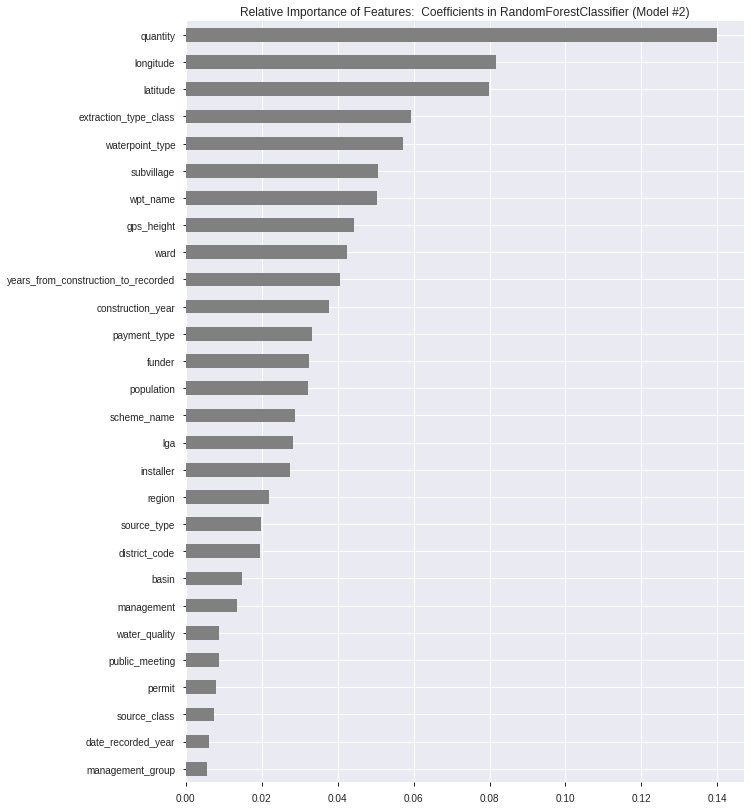

In [52]:
# Feature importances:
%matplotlib inline
import matplotlib.pyplot as plt

m2_rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_train).columns
importances = pd.Series(m2_rf.feature_importances_, encoded_columns)

# Plot feature importances:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
importances.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in RandomForestClassifier (Model #2)')
plt.show()

Permutation importances:

In [53]:
# [?? To do:  Add permutation importance for comparison ??]

# Separates out the estimator -- remove it from the pipeline -- so we can 
# use the eli5 library to get find permutation importances (Ryan: "eli5 
# doesn't work well with pipelines.")

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

m2_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, n_jobs=-1, random_state=42)  # max_depth=22, min_samples_leaf=5, min_weight_fraction_leaf=??
# [?? To do: Remove random_states at end ??]
m2_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
pd.DataFrame(X_val_transformed).isnull().sum().sum()

0

In [0]:
# # Find the permutation importances:
# import eli5
# from eli5.sklearn import PermutationImportance

# permuter = PermutationImportance(
#     m2_rf, 
#     scoring='accuracy', 
#     n_iter=5, 
#     cv=5, 
#     random_state=42
# )

# permuter.fit(X_val_transformed, y_val)

# # # Performance on training data:
# # y_true_m2_train = y_train
# # y_pred_m2_train = pipeline.predict(X_train)

# # print('Model performance on training set:\n')
# # print(f'Training set accuracy: {accuracy_score(y_true_m2_train, y_pred_m2_train):.3f}')
# # recall_m2_train = recall_score(y_true_m2_train, y_pred_m2_train, average='micro')
# # print(f'Training set recall (TP / (TP + FN)): {recall_m2_train:.3f}\n')

In [0]:
# # Show table of the permutation importance values for each feature:
# feature_names = X_val.columns.tolist()
# pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

In [0]:
# eli5.show_weights(
#     permuter, 
#     top-None, 
#     feature_names=feature_names
# )

**Model 3:  Gradient-Boosted Trees Ensemble:**

In [0]:
# [?? To do:  Use GridSearchCV() to find the best hyperparameter values for the below ??]

In [59]:
from xgboost import XGBClassifier


pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    XGBClassifier(n_estimators=50, max_depth=14, n_jobs=-1, random_state=42)  # max_depth=22, min_samples_leaf=5, min_weight_fraction_leaf=??
    # [?? To do: Remove random states at end ??]
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_m3_train = y_train
y_pred_m3_train = pipeline.predict(X_train)

print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_m3_train, y_pred_m3_train):.3f}')
recall_m3_train = recall_score(y_true_m3_train, y_pred_m3_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_m3_train:.3f}\n')

# Apply to validation data and get score:
y_true_m3_val = y_val
y_pred_m3_val = pipeline.predict(X_val)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_m3_val, y_pred_m3_val):.3f}')
recall_m3_val = recall_score(y_true_m3_val, y_pred_m3_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_m3_val:.3f}\n')

Model performance on training set:

Training set accuracy: 0.943
Training set recall (TP / (TP + FN)): 0.943

Model performance on validation set:

Validation set accuracy: 0.803
Validation set recall (TP / (TP + FN)): 0.803



In [60]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_m3 = pd.DataFrame(confusion_matrix(y_true_m3_val, y_pred_m3_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_m3 / cm_m3.sum().sum()).sum().sum(), 10) == 1.0
cm_m3_normalized = cm_m3 / cm_m3.sum().sum()
cm_m3_normalized

Confusion matrix (normalized):


0         1         2
0  0.485791  0.010034  0.047273
1  0.039327  0.021481  0.011852
2  0.084040  0.004310  0.295892

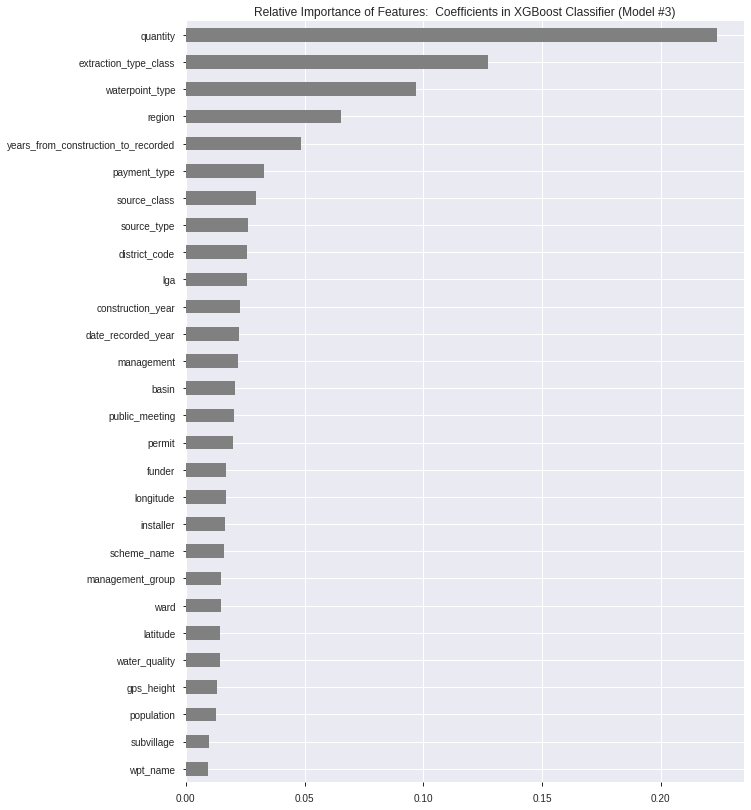

In [61]:
# Feature importances:
%matplotlib inline
import matplotlib.pyplot as plt

m3_gbt = pipeline.named_steps['xgbclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_train).columns
importances = pd.Series(m3_gbt.feature_importances_, encoded_columns)

# Plot feature importances:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
importances.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in XGBoost Classifier (Model #3)')
plt.show()

**Model 4:  ExtraTreesClassifier With Cross-validation and Hyperparameter Tuner:**

In [0]:
# [?? To do:  Hyperparameter tuner -- GridSearchCV() with the below ??]

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
  ce.OrdinalEncoder(), 
  SimpleImputer(strategy='mean'), 
  # StandardScaler(), 
  ExtraTreesClassifier(n_estimators=100, min_samples_leaf=2, bootstrap=True, n_jobs=-1, random_state=42)  # max_depth=15, min_samples_leaf=5, min_weight_fraction_leaf=0.001
  # [?? To do: Remove random states at end ??]
  )

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_m4_train = y_train
y_pred_m4_train = pipeline.predict(X_train)

print(f'Training set accuracy: {accuracy_score(y_true_m4_train, y_pred_m4_train):.3f}')
recall_m4_train = recall_score(y_true_m4_train, y_pred_m4_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_m4_train:.3f}\n')

# Apply to validation data and get score:
y_true_m4_val = y_val
y_pred_m4_val = pipeline.predict(X_val)
print(f'Validation set accuracy: {accuracy_score(y_true_m4_val, y_pred_m4_val):.3f}')
recall_m4_val = recall_score(y_true_m4_val, y_pred_m4_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_m4_val:.3f}\n')

Training set accuracy: 0.892
Training set recall (TP / (TP + FN)): 0.892

Validation set accuracy: 0.808
Validation set recall (TP / (TP + FN)): 0.808



In [64]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_m4 = pd.DataFrame(confusion_matrix(y_true_m4_val, y_pred_m4_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_m4 / cm_m4.sum().sum()).sum().sum(), 10) == 1.0
cm_m4_normalized = cm_m4 / cm_m4.sum().sum()
cm_m4_normalized

Confusion matrix (normalized):


0         1         2
0  0.498316  0.005657  0.039125
1  0.042896  0.018586  0.011178
2  0.089091  0.003569  0.291582

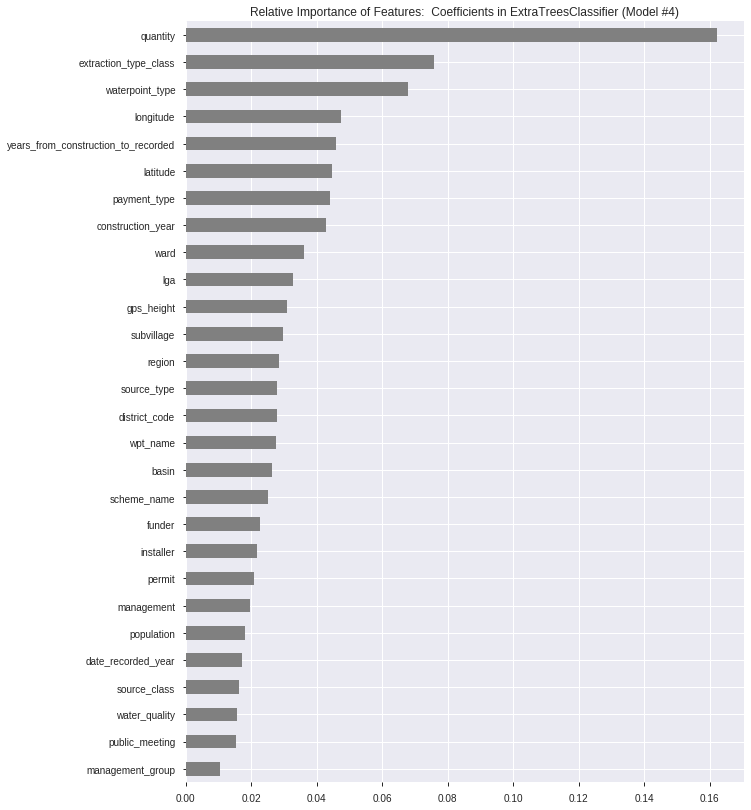

In [65]:
# Feature importances:
%matplotlib inline
import matplotlib.pyplot as plt

m4_xtrees = pipeline.named_steps['extratreesclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_train).columns
importances = pd.Series(m4_xtrees.feature_importances_, encoded_columns)

# Plot feature importances:
n = len(encoded_columns)
plt.figure(figsize=(10, n/2))
importances.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in ExtraTreesClassifier (Model #4)')
plt.show()

In [0]:
# [?? To do tomorrow ??]

In [0]:
# Get CSV of training set:
# train.to_csv('train_to_csv.csv')
# ---------------------------------------
# from google.colab import files
# files.download('train_to_csv.csv')

In [0]:
# # Apply to test data and get CSV of predictions for Kaggle:
# y_pred_b4_test = pipeline.predict(X_test)

# # Make the Kaggle submission dataframe for export as CSV:
# submission_1105_0120 = sample_submission.copy()
# submission_1105_0120['status_group'] = y_pred_b4_test

# # Export as CSV file:
# submission_1105_0120.to_csv('chris_huskey_submission_01_20191105_0125.csv', index=False)

In [0]:
# # Download the CSV for submission to Kaggle:
# from google.colab import files
# files.download('chris_huskey_submission_01_20191105_0125.csv')